In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_csv(file):
    df = pd.read_csv(file, parse_dates=True, index_col=0)
    return df

## XGBoost for Nature imputed dataset


In [3]:
y_true = pd.read_csv(r'output\/CompleteCovid.csv',index_col=0).Asia_confirmed_cases
y_true_train = y_true.loc['2020-01-22 09:00:00':'2020-02-26 02:00:00']
y_true_test =  y_true.loc['2020-02-26 02:30:00':]

X_train = read_csv('output/\CompleteCovidNatureTrain_0.csv')
X_test = read_csv('output/\CompleteCovidNatureTest_0.csv')

y_train = X_train.Asia_confirmed_cases
y_test = X_test.Asia_confirmed_cases

X_train = X_train.drop('Asia_confirmed_cases', axis=1)
X_test = X_test.drop('Asia_confirmed_cases', axis=1)


xgb_model = xgb.XGBClassifier(objective="reg:squarederror",
                                  eval_metric = 'rmse',
                                  max_depth=3,
                                  n_estimators=30,
                                  learning_rate=0.1
                              )
model = xgb_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("\nRMSE: ", np.round(RMSE, 2))


y_true_test_reduced = pd.concat([y_true_test, y_test], axis=1).dropna().iloc[:, 0]
y_pred_reduced = pd.concat([y_true_test, pd.DataFrame(data=y_pred, index=y_true_test.index)], axis=1).dropna().iloc[:, 1]

MSE_real = mse(y_true_test_reduced, y_pred_reduced)
RMSE_real = np.sqrt(MSE_real)

print("\nRMSE with only real values: ", np.round(RMSE_real, 2))


RMSE:  7684.22

RMSE with only real values:  13345.79


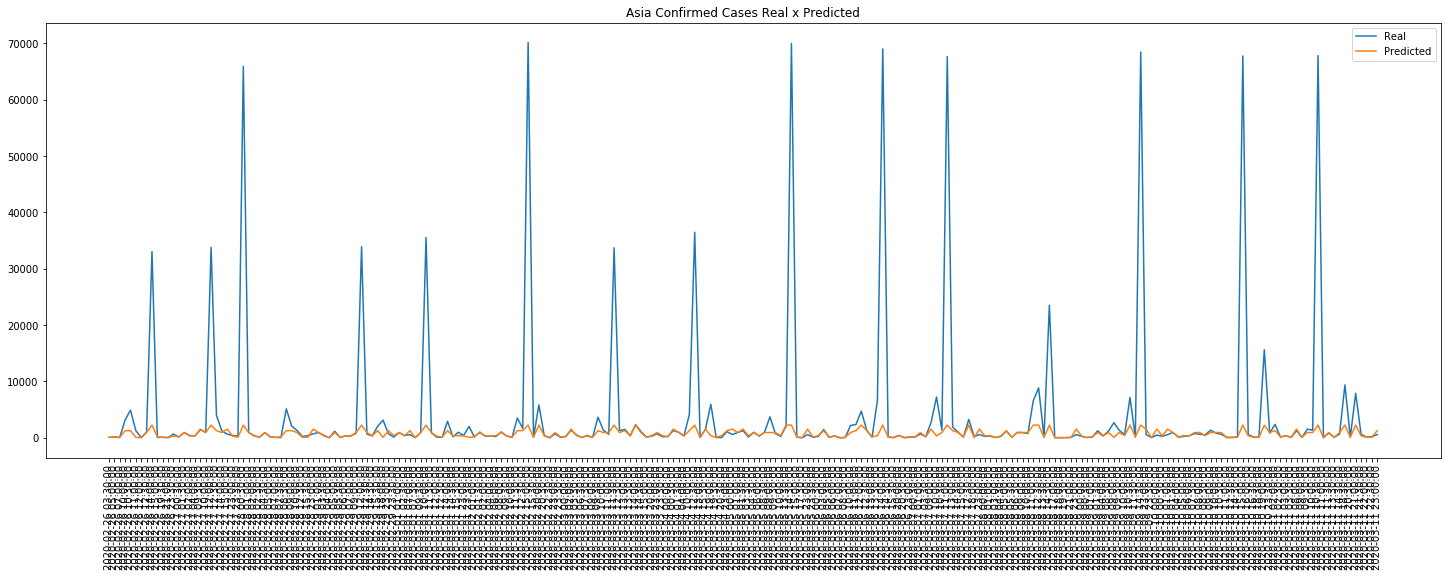

In [4]:
plt.figure(figsize=(25, 8))
plt.plot(y_true_test_reduced.index, y_true_test_reduced.values, label='Real')
plt.plot(y_pred_reduced.index, y_pred_reduced.values, label='Predicted')
plt.title("Asia Confirmed Cases Real x Predicted")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [7]:
def run_experiment_multiple_times(n=30):
    result_dict = {}
    result_dict= {'rmse':0, 'true_rmse':0, 'best_model':None, 'best_rmse':999999999999, 'best_true_rmse':999999999999}
    list_rmse = []
    list_true_rmse = []
    for i in range(0,n):
        y_true = pd.read_csv(r'output\/CompleteCovid.csv',index_col=0).Asia_confirmed_cases
        y_true_train = y_true.loc['2020-01-22 09:00:00':'2020-02-26 02:00:00']
        y_true_test =  y_true.loc['2020-02-26 02:30:00':]

        X_train = read_csv('output/\CompleteCovidNatureTrain_0.csv')
        X_test = read_csv('output/\CompleteCovidNatureTest_0.csv')

        y_train = X_train.Asia_confirmed_cases
        y_test = X_test.Asia_confirmed_cases

        X_train = X_train.drop('Asia_confirmed_cases', axis=1)
        X_test = X_test.drop('Asia_confirmed_cases', axis=1)


        xgb_model = xgb.XGBClassifier(objective="reg:squarederror",
                                          eval_metric = 'rmse',
                                          max_depth=3,
                                          n_estimators=30,
                                          learning_rate=0.1
                                      )
        model = xgb_model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        MSE = mse(y_test, y_pred)
        RMSE = np.sqrt(MSE)
        
        y_true_test_reduced = pd.concat([y_true_test, y_test], axis=1).dropna().iloc[:, 0]
        y_pred_reduced = pd.concat([y_true_test, pd.DataFrame(data=y_pred, index=y_true_test.index)], axis=1).dropna().iloc[:, 1]

        MSE_real = mse(y_true_test_reduced, y_pred_reduced)
        RMSE_real = np.sqrt(MSE_real)

        
        print('Round', i, "rmse", RMSE)
        print('Round', i, "true rmse", RMSE_real)
        result_dict['rmse'] += RMSE
        result_dict['true_rmse'] += RMSE_real
        list_rmse.append(RMSE)
        list_true_rmse.append(RMSE_real)
        if result_dict['best_rmse'] > RMSE:
            result_dict['best_rmse'] = RMSE
            result_dict['best_model'] = model
            result_dict['best_true_rmse'] = RMSE_real
            
    print("STD RMSE", np.std(list_rmse, axis=0))
    print("STD TRUE RMSE", np.std(list_true_rmse, axis=0))
    result_dict['rmse'] = result_dict['rmse']/n
    result_dict['true_rmse'] = result_dict['true_rmse']/n
    return result_dict     

In [8]:
result_dict = run_experiment_multiple_times(n=30)

Round 0 rmse 7684.22365574271
Round 0 true rmse 13345.792395623614
Round 1 rmse 7684.22365574271
Round 1 true rmse 13345.792395623614
Round 2 rmse 7684.22365574271
Round 2 true rmse 13345.792395623614
Round 3 rmse 7684.22365574271
Round 3 true rmse 13345.792395623614
Round 4 rmse 7684.22365574271
Round 4 true rmse 13345.792395623614
Round 5 rmse 7684.22365574271
Round 5 true rmse 13345.792395623614
Round 6 rmse 7684.22365574271
Round 6 true rmse 13345.792395623614
Round 7 rmse 7684.22365574271
Round 7 true rmse 13345.792395623614
Round 8 rmse 7684.22365574271
Round 8 true rmse 13345.792395623614
Round 9 rmse 7684.22365574271
Round 9 true rmse 13345.792395623614
Round 10 rmse 7684.22365574271
Round 10 true rmse 13345.792395623614
Round 11 rmse 7684.22365574271
Round 11 true rmse 13345.792395623614
Round 12 rmse 7684.22365574271
Round 12 true rmse 13345.792395623614
Round 13 rmse 7684.22365574271
Round 13 true rmse 13345.792395623614
Round 14 rmse 7684.22365574271
Round 14 true rmse 1334

In [9]:
result_dict

{'rmse': 7684.22365574271,
 'true_rmse': 13345.792395623617,
 'best_model': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=30, n_jobs=0,
               num_parallel_tree=1, objective='multi:softprob', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 'best_rmse': 7684.22365574271,
 'best_true_rmse': 13345.792395623614}